# Análise de Dados Airbnb no Rio de Janeiro

# processo

verificar o tipo de dado para cada dataset: verificar com o negocio se existe alguma regra ou tratar

# feature engineering

### feature transformation

# tratamento de valores e nulos
entendimento das features e da estrategia de negocio para preencher os valores de acordo.
o que sobrar seguir alguma arbitrariedade: media, moda, etc.

# tratamento de duplicados e valores exclusivos por tabela
verificar a presença de duplicados na tabela dimensão.
verificar se as tabelas contem os mesmos ids, se não existe id faltante. comunicar o time de negocio

# distribuição dos dados

# testes de hipóteses 


# multicolinearidade e vif

# verificação e tratamento de outliers
scale e normalização dos dados
analisar a distribuição dos dados.

# scaling e padronização dos dados



# tratamento de valores categóricos
encoding: verificar possibilidades 


# feature creation
trazer dados geolocalizados e de informações sobre os bairros para o dataset.
criar colunas que façam sentido para complementar o processo de predição de targets.
merge de tabelas.

# feature selection


# definicação de targets

# insgights dos dados



# Informações sobre os tipos de quartos

Entire home/apt:
You have the complete property, including bedrooms, bathrooms, kitchen, and living areas, all to yourself. 

Private room:
You have a private bedroom, but you'll share other spaces like the bathroom, kitchen, and living room with the host or other guests.

Shared room:
You'll be sleeping in a room with other guests, sharing the entire space with them.
 
Hotel room:
You'll be staying in a hotel, which may offer private or shared rooms, and usually includes hotel-style amenities and services. 

https://www.airbnb.com.br/help/article/5?_set_bev_on_new_domain=1755286755_EANWY1NTJmMmI5ZD#:~:text=Entire%20places%20are%20best%20if,entire%20space%20with%20other%20people.


# Requisitos do projeto



# configuração

In [1]:
# carregamento de bibliotecas
import sys
import os
# Adiciona a pasta raiz do projeto (onde está a pasta src) ao sys.path
sys.path.append(os.path.abspath(os.path.join("..")))
from src.config.logging_config import setup_logging
from src.data.load_data import carregar_dataset
from src.data.processing import *
from src.data.visualize import *
import pandas as pd

In [2]:
# configurações de logging
setup_logging()

In [3]:
# carregamento dos datasets
listings = carregar_dataset('../data/raw/listings_cleaned.csv',sep=',')
reviews = carregar_dataset('../data/raw/reviews.csv',sep=',')

2025-08-22 18:33:17,395 | INFO | src.data.load_data | Captura do arquivo csv no path:../data/raw/listings_cleaned.csv
2025-08-22 18:33:17,422 | INFO | src.data.load_data | Captura do arquivo csv no path:../data/raw/reviews.csv


In [4]:
# amostragem dos dados do dataset listings
amostra_dados(listings)

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
1519,3059386,Jardim Botânico,Entire home/apt,5,1.5,1.0,4.0,221.0
2414,7308325,Copacabana,Entire home/apt,2,1.0,1.0,1.0,723.0
25296,1043692456456239189,Copacabana,Entire home/apt,4,1.0,0.0,2.0,1125.0


In [5]:
# amostragem dos dados do dataset listings
amostra_dados(reviews)

,id,number_of_reviews,review_scores_rating
16100,849173250478069918,0,4.812309
19194,1011513540533070565,0,4.812309
21401,1057405044767310010,27,4.930000


In [6]:
# requisito projeto: visualização do head do dataset listings
listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [7]:
# requisito projeto: visualização do head da dataset reviews
listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [8]:
# informações do dataset listings
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB


# Identificação de transformação
Presença de valores float na coluna bathrooms, bedrooms e beds. Será tratado após a transformação de valores devido a presença de valores nulos.

In [9]:
# checagem dos valores das coluna bathrooms
contagem_valores(coluna=listings.bathrooms)

bathrooms
1.0     22365
2.0      7457
1.5      1966
3.0      1669
2.5      1104
3.5       420
4.0       388
0.0       280
0.5       229
5.0       162
4.5       156
6.0       107
5.5        83
7.0        65
6.5        47
8.0        43
11.0       17
7.5        16
10.0       10
9.0         7
8.5         6
12.0        4
10.5        2
16.0        2
15.0        1
20.0        1
11.5        1
12.5        1
Name: count, dtype: int64

In [10]:
# verificação dos valores da coluna bedrooms que aparecem como float
contagem_valores(listings.bedrooms)

bedrooms
1.0     22566
2.0      9583
3.0      3934
0.0      1499
4.0       864
5.0       309
6.0       127
7.0        39
10.0       16
8.0        15
9.0         6
11.0        4
25.0        3
13.0        3
15.0        1
20.0        1
17.0        1
12.0        1
16.0        1
26.0        1
22.0        1
30.0        1
Name: count, dtype: int64

In [11]:
# verificação dos valores da coluna beds que aparecem como float
contagem_valores(listings.beds)

beds
1.0     12596
2.0     11192
3.0      5895
4.0      3141
5.0      1462
6.0       785
0.0       620
7.0       291
8.0       248
9.0        99
10.0       91
12.0       41
11.0       40
16.0       24
14.0       20
15.0       14
13.0       10
18.0       10
17.0        7
23.0        5
25.0        4
22.0        4
20.0        4
19.0        4
35.0        3
43.0        2
50.0        2
46.0        2
21.0        2
40.0        2
32.0        1
38.0        1
39.0        1
29.0        1
24.0        1
56.0        1
30.0        1
26.0        1
41.0        1
44.0        1
Name: count, dtype: int64

In [12]:
# verificação dos valores da coluna price que aparecem como float
lista_preco_aplicado = contagem_valores(listings.price).index.unique()
lista_preco_aplicado

Index([ 1000.0,   500.0,   800.0,   600.0,   400.0,  1500.0,  1200.0,   300.0,
         700.0,   350.0,
       ...
       20237.0,  7489.0,  2759.0,  1576.0,  4622.0,  1608.0,  6755.0, 16225.0,
        3440.0,  4343.0],
      dtype='float64', name='price', length=3402)

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-null  int64  
 2   review_scores_rating  32695 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 766.4 KB


# Feature Creation

In [14]:
# verificação dos ids de tabela
tbl_anuncios = pd.merge(listings, reviews, on='id')
tbl_anuncios

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000
...,...,...,...,...,...,...,...,...,...,...
32690,1319593870376466401,Copacabana,Entire home/apt,4,2.0,1.0,2.0,957.0,0,4.812309
32691,1319611826461021550,Jacarezinho,Entire home/apt,8,1.0,1.0,1.0,288.0,0,4.812309
32692,1319620401959854025,Copacabana,Entire home/apt,6,1.0,1.0,4.0,672.0,0,4.812309
32693,1319650312466603776,Ipanema,Entire home/apt,6,1.5,2.0,1.0,1083.0,0,4.812309


In [19]:
tbl_anuncios.query('number_of_reviews==0')

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
32,86978,Jacarepaguá,Private room,2,2.0,1.0,2.0,1011.0,0,4.812309
40,293171,Santa Teresa,Entire home/apt,3,0.0,0.0,2.0,281.0,0,4.812309
45,99336,Itanhangá,Entire home/apt,6,2.0,4.0,5.0,1143.0,0,4.812309
68,137150,Lagoa,Entire home/apt,4,2.0,2.0,2.0,3371.0,0,4.812309
...,...,...,...,...,...,...,...,...,...,...
32690,1319593870376466401,Copacabana,Entire home/apt,4,2.0,1.0,2.0,957.0,0,4.812309
32691,1319611826461021550,Jacarezinho,Entire home/apt,8,1.0,1.0,1.0,288.0,0,4.812309
32692,1319620401959854025,Copacabana,Entire home/apt,6,1.0,1.0,4.0,672.0,0,4.812309
32693,1319650312466603776,Ipanema,Entire home/apt,6,1.5,2.0,1.0,1083.0,0,4.812309


# Feature Transformation

# Arredondamento dos valores da coluna bathrooms
Decidi seguir com o arrendondamento do valor, pois não temos a informação do negócio para validar que um valor decimal possa indicar uma categoria específica de banheiro, como lavabo. Possuindo essa informação, poderíamos manter o valor decimal e criar uma flag para indicar a presença de banheiro lavabo. Após o tratamento de valores nulos, seguirei com a transformação do tipo de dado da coluna.

In [254]:
# arrendondamento dos valores da coluna bathrooms e transformação do tipo da coluna
listings.bathrooms= listings.bathrooms.round(decimals=0)

# Verificação de valores nulos

In [255]:
# Verificação de nulos da tabela listings
qtde_nulos_listings = verificacao_nulos(listings)
qtde_nulos_listings

id                           0
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bathrooms                 2890
bedrooms                   523
beds                      2869
price                     2855
dtype: int64

In [256]:
# filtragem das linhas nulas da tabela listings
filtrar_linhas_valores_nulos(listings)

2025-08-22 18:27:27,259 | INFO | src.data.processing | Contagem de linhas nulas para o dataframe:2951


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
14,48901,Copacabana,Entire home/apt,11,NaN,4.0,NaN,NaN
27,285554,São Conrado,Private room,2,NaN,NaN,NaN,NaN
30,61661,Copacabana,Entire home/apt,4,NaN,1.0,2.0,280.0
42,77318,Gávea,Entire home/apt,4,NaN,2.0,NaN,NaN
51,291771,Copacabana,Entire home/apt,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
38641,1312249304842327664,Copacabana,Shared room,1,1.0,NaN,1.0,346.0
38668,1312276581071924139,Copacabana,Shared room,1,1.0,NaN,1.0,300.0
38862,1314425131435298482,Copacabana,Shared room,1,1.0,NaN,1.0,257.0
38934,1314633476374001303,Copacabana,Private room,2,NaN,1.0,1.0,1040.0


# Necessidade de verificar se há linhas duplicadas de cadastro: presença de nulos nas mesmas posições de index

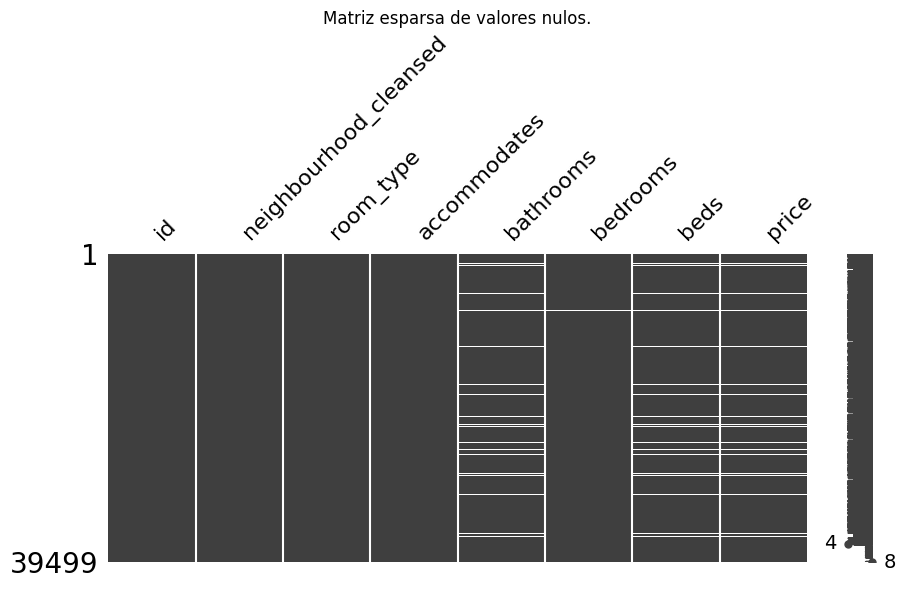

In [257]:
# matriz de valores nulos do dataset listings
matriz_valores_nulos(listings)

In [258]:
# frequência de valores nulos por coluna
frequencia_valores_nulos(listings)

,missing,total,percent
bathrooms,2890,39499,7.316641
beds,2869,39499,7.263475
price,2855,39499,7.228031
bedrooms,523,39499,1.324084
accommodates,0,39499,0.000000
room_type,0,39499,0.000000
neighbourhood_cleansed,0,39499,0.000000
id,0,39499,0.000000


In [259]:
# Verificação de nulos da tabela reviews
qtde_nulos_reviews = verificacao_nulos(reviews)
qtde_nulos_reviews

id                      0
number_of_reviews       0
review_scores_rating    0
dtype: int64

# Verificação de duplicados

In [260]:
# verificação de linhas duplicadas da tabela listings
verificar_linhas_duplicadas(listings)

,,,,,,,,n_duplicates
id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,


In [261]:
# contagem de ids ds tabela para reforçar a verificação de duplicados.
agrupar_dados(df=listings, cols_agrup=['id'],cols_filter=['id'],agr='count')

2025-08-22 18:27:27,454 | INFO | src.data.processing | Agrupamento selecionado: ['id'], filtragem dataset:['id'], método: count


,id
id,
17878,1
25026,1
35764,1
48305,1
48901,1
...,...
1319788415856675269,1
1319789833488757744,1
1319797898531185231,1


In [262]:
# verificação complementar do número de linhas
listings.id.unique()

array([             271975,              272335,              272631, ...,
       1319620401959854025, 1319650312466603776, 1319654458578424849],
      shape=(39499,))

In [263]:
# informações do dataset reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    32695 non-null  int64  
 1   number_of_reviews     32695 non-null  int64  
 2   review_scores_rating  32695 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 766.4 KB


# Verificar com o negócio ou tratar esses dados: Insights resultantes da filtragem.

Possibilidades: cadastro room_type errado ou 'Entire home/apt' intencional.

'Entire home/apt' and bathrooms<1  bathrooms = (0 e 0.05) # substituir bathrooms por 1 (por questão de legislação, apartamento estudio e casa precisam ter banheiro)
'Entire home/apt' and bedrooms<1 and beds<1" = (0) # provavelmente algum tipo de kitnet.


'Private room' and bedrooms.isna()# substituir bedrooms por 1 - exigência da categorização.
'Private room' and beds.isna()" # substituir pela divisão de roundup(accomodates/2)  # erro de publicação do anfitrião - exigência da categorização.

'Shared room' # é o mais flexível e exige uma interferência do negócio para entender os valores valores nulos.
'Shared room' and (bedrooms.isna() or bathrooms.isna())" # substituir bedrooms e bathrooms por zero, pois não é um tipo de acomodação dedicada.


'Hotel room' and bathrooms.isna() # verificar com o negócio se é compartilhado e substituir por bathrooms = 0 e beds = 1.
'Hotel room' and bedrooms<1 # mesmo compartilhado, pra ser quarto de hotel precisa ser um quarto. substituir por 1.


"Preço recebe o tratamento por média por categoria room_type e bairro, remanescenetes recebem a media da categoria room_type.

In [264]:
# contagem dos valores por categoria da feature room_type
listings.room_type.value_counts()

room_type
Entire home/apt    31728
Private room        7483
Shared room          260
Hotel room            28
Name: count, dtype: int64

In [265]:
# filtragem de valores via query no dataset para definir tratamento com o time de negócio
tbl_feature = filtrar_feature_valor_categorico(df=listings, query=f"room_type=='Hotel room'")
tbl_feature

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
1012,2336651,Leblon,Hotel room,2,1.0,1.0,1.0,1853.0
1971,4557003,Santa Teresa,Hotel room,2,1.0,0.0,1.0,870.0
3154,10626211,Leblon,Hotel room,6,2.0,2.0,2.0,1737.0
3421,11607165,Ipanema,Hotel room,1,1.0,2.0,1.0,59.0
3628,12306706,Botafogo,Hotel room,2,2.0,1.0,1.0,1068.0
3629,12306768,Botafogo,Hotel room,3,4.0,1.0,2.0,760.0
3641,12307393,Botafogo,Hotel room,4,2.0,1.0,4.0,1409.0
3642,12307400,Botafogo,Hotel room,2,2.0,2.0,1.0,861.0
6234,21785116,Jacarepaguá,Hotel room,3,1.0,1.0,1.0,346.0
6577,22883940,Praça da Bandeira,Hotel room,3,NaN,1.0,NaN,NaN


# Transformação de valores e preenchimento de nulos
Após identificar as mudanças, aplico a transformação dos valores conforme as regras lógicas identificadas acima.

In [266]:
listings.room_type.value_counts()

room_type
Entire home/apt    31728
Private room        7483
Shared room          260
Hotel room            28
Name: count, dtype: int64

In [267]:
# transformação para os valores da coluna room_type=='Entire home/apt' 
entire_home_apt = imputar_dados_room_type_entire_home_apt(listings)
listings.update(entire_home_apt)

In [268]:
# transformação para os valores da coluna room_type=='Private room' 
private_room = imputar_dados_room_type_private_room(listings)
listings.update(private_room)

In [269]:
# transformação para os valores da coluna room_type=='Shared room' 
shared_room = imputar_dados_room_type_shared_room(listings)
listings.update(shared_room)


In [270]:
# transformação para os valores da coluna room_type=='Hotel room' 
hotel_room = imputar_dados_room_type_hotel_room(listings)
listings.update(hotel_room)

In [271]:
# transformação para os valores da coluna price 
price = imputar_dados_price(listings)
listings.update(price)

In [272]:
# verificação do tratamento dos dados: valores tratados sem a presença de nulos
frequencia_valores_nulos(listings)

,missing,total,percent
id,0,39499,0.0
neighbourhood_cleansed,0,39499,0.0
room_type,0,39499,0.0
accommodates,0,39499,0.0
bathrooms,0,39499,0.0
bedrooms,0,39499,0.0
beds,0,39499,0.0
price,0,39499,0.0


In [273]:
# transformação do tipo de coluna
listings[['bathrooms','bedrooms','beds']] = listings[['bathrooms','bedrooms','beds']] .astype(int)

In [274]:
# verificação do tratamento realizado na tabela listings
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               39499 non-null  int64  
 5   bedrooms                39499 non-null  int64  
 6   beds                    39499 non-null  int64  
 7   price                   39499 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.4+ MB


# Feature Creation

In [276]:
# verificação dos ids de tabela
tbl_anuncios = pd.merge(listings, reviews, on='id')
tbl_anuncios

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1,1,1,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1,1,2,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,4,3,3,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1,1,1,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2,2,6,1411.0,654,4.830000
...,...,...,...,...,...,...,...,...,...,...
10972,1312233562849085184,Centro,Entire home/apt,4,1,2,3,139.0,1,5.000000
10973,1314584649162718208,Copacabana,Entire home/apt,3,1,1,2,650.0,0,4.812309
10974,1315163092035970560,Copacabana,Entire home/apt,6,4,4,4,2257.0,0,4.812309
10975,1316076374416058624,Copacabana,Entire home/apt,6,2,3,1,1200.0,0,4.812309


In [202]:
tbl_propriedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10977 non-null  int64  
 1   number_of_reviews       10977 non-null  int64  
 2   review_scores_rating    10977 non-null  float64
 3   neighbourhood_cleansed  10977 non-null  object 
 4   room_type               10977 non-null  object 
 5   accommodates            10977 non-null  int64  
 6   bathrooms               10977 non-null  int64  
 7   bedrooms                10977 non-null  int64  
 8   beds                    10977 non-null  int64  
 9   price                   10977 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 857.7+ KB


In [ ]:
# junção dos datasets


In [42]:
# filtragem de valores via query no dataset para definir tratamento com o time de negócio
tbl_feature = filtrar_feature_valor_categorico(df=listings, query=f"room_type=='Entire home/apt' and accommodates==11")
tbl_feature

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
14,48901,Copacabana,Entire home/apt,11,NaN,4.0,NaN,NaN
352,853793,Vidigal,Entire home/apt,11,3.0,5.0,9.0,1600.0
912,2242397,Lagoa,Entire home/apt,11,2.0,5.0,5.0,2263.0
2539,8390419,Copacabana,Entire home/apt,11,2.0,5.0,5.0,3486.0
2875,9806772,Copacabana,Entire home/apt,11,3.0,4.0,4.0,1500.0
2972,10170491,Copacabana,Entire home/apt,11,4.0,4.0,10.0,1714.0
3065,10449328,São Conrado,Entire home/apt,11,7.0,4.0,8.0,20000.0
3501,11767719,Copacabana,Entire home/apt,11,3.0,3.0,7.0,2371.0
3595,11948645,Recreio dos Bandeirantes,Entire home/apt,11,2.0,2.0,4.0,905.0
3750,12535973,Guaratiba,Entire home/apt,11,3.0,3.0,3.0,2150.0


In [ ]:
# quantidade de acomodações por bairro
qtde_acomodacao_por_bairro = agrupar_dados(df=listings, cols_agrup=['neighbourhood_cleansed'],cols_filter=['room_type'],agr='count')
qtde_acomodacao_por_bairro.sort_values(by='room_type', ascending=False)

2025-08-22 14:26:22,349 | INFO | src.data.processing | Agrupamento selecionado: ['neighbourhood_cleansed'], filtragem dataset:['room_type'], método: count


,room_type
neighbourhood_cleansed,
Copacabana,12352
Barra da Tijuca,3612
Ipanema,3570
Recreio dos Bandeirantes,2060
Jacarepaguá,1848
...,...
Jacarezinho,1
Deodoro,1
Complexo do Alemão,1


In [ ]:
# média de preço por tipo de acomodação nos bairros do rio de janeiro
media_tipo_acomodacao_por_bairro = agrupar_dados(df=listings, cols_agrup=['neighbourhood_cleansed', 'room_type'], cols_filter=['price'], agr='mean')
media_tipo_acomodacao_por_bairro

2025-08-22 14:26:22,377 | INFO | src.data.processing | Agrupamento selecionado: ['neighbourhood_cleansed', 'room_type'], filtragem dataset:['price'], método: mean


price
neighbourhood_cleansed room_type                   
Abolição               Entire home/apt  1190.750000
                       Private room      846.000000
Alto da Boa Vista      Entire home/apt  2133.538462
                       Private room      529.357143
Anchieta               Entire home/apt  6068.000000
...                                             ...
Vila Valqueire         Private room      231.625000
Vila da Penha          Entire home/apt   366.833333
                       Private room      352.714286
Zumbi                  Private room      115.000000
Água Santa             Entire home/apt   514.000000

[331 rows x 1 columns]

# Construir média de preço por pessoa

In [ ]:
listings.merge(reviews, on='id', how='left')

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0,NaN,NaN
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367.0,4.920000
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32.0,5.000000
3,273261,Leblon,Entire home/apt,6,4.0,3.0,3.0,6742.0,0.0,4.812309
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5.0,5.000000
...,...,...,...,...,...,...,...,...,...,...
39494,1319593870376466401,Copacabana,Entire home/apt,4,2.0,1.0,2.0,957.0,0.0,4.812309
39495,1319611826461021550,Jacarezinho,Entire home/apt,8,1.0,1.0,1.0,288.0,0.0,4.812309
39496,1319620401959854025,Copacabana,Entire home/apt,6,1.0,1.0,4.0,672.0,0.0,4.812309
39497,1319650312466603776,Ipanema,Entire home/apt,6,2.0,2.0,1.0,1083.0,0.0,4.812309
